## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
%matplotlib inline
df=pd.read_csv('cleaned_ecommerce_dataset.csv')   #reading CSV file to df variable

In [232]:
length=len(df)#gives number of rows of our file
print('the Total length of data is',length)

the Total length of data is 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [147]:
df.shape  #gives number of rows and column of our data

(2685, 11)

In [148]:
df.head(10)  #shows first 10 rows from our datasets

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
5,4081,100399,Good for sci-fi,Matrix,3.0,3.0,M,Movies,40,24.51,4
6,4081,100399,Scary? you bet!,Blair Witch Project,4.0,3.0,M,Movies,12,44.00,4
7,4081,101899,Fox - the 4th basic channel,FOX,4.0,4.0,M,Media,25,80.00,4
8,4081,112099,Amen!,Dogma,4.0,3.0,M,Movies,22,87.59,4
9,4081,122899,mama mia!,Olive Garden,4.0,3.0,M,Restaurants & Gourmet,49,32.00,4


In [149]:
df.info()  #gives the data type and attributes stored by our variables/columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [150]:
df['category'].unique().tolist()

['Restaurants & Gourmet',
 'Movies',
 'Media',
 'Kids & Family',
 'Online Stores & Services',
 'Games',
 'Hotels & Travel',
 'Books',
 'Personal Finance']

In [151]:
df.isnull().sum() #checking the number of null values in features/variables

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [152]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()   #Initializing ordinal encoder
df[["gender_code","helpfulness_code","category_code","review_code"]] = ord_enc.fit_transform(df[["gender","helpfulness","category","review"]]) #converting the categorical data to numerical data and fitting in our dataset
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,gender_code,helpfulness_code,category_code,review_code
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,1.0,0.0,8.0,1618.0
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,1.0,1.0,8.0,1125.0
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,1.0,1.0,8.0,2185.0
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,1.0,0.0,5.0,2243.0
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,1.0,0.0,5.0,1033.0
5,4081,100399,Good for sci-fi,Matrix,3.0,3.0,M,Movies,40,24.51,4,1.0,0.0,5.0,925.0
6,4081,100399,Scary? you bet!,Blair Witch Project,4.0,3.0,M,Movies,12,44.00,4,1.0,0.0,5.0,1854.0
7,4081,101899,Fox - the 4th basic channel,FOX,4.0,4.0,M,Media,25,80.00,4,1.0,1.0,4.0,795.0
8,4081,112099,Amen!,Dogma,4.0,3.0,M,Movies,22,87.59,4,1.0,0.0,5.0,262.0
9,4081,122899,mama mia!,Olive Garden,4.0,3.0,M,Restaurants & Gourmet,49,32.00,4,1.0,0.0,8.0,2643.0


In [153]:
correlation=df[['helpfulness_code','gender_code','category_code','review_code','rating']].corr()#creating correlation between different features mentioned
correlation.head(10)

,helpfulness_code,gender_code,category_code,review_code,rating
helpfulness_code,1.000000,0.075947,-0.013408,-0.028259,-0.007523
gender_code,0.075947,1.000000,0.022549,-0.037884,-0.034337
category_code,-0.013408,0.022549,1.000000,0.001970,-0.163158
review_code,-0.028259,-0.037884,0.001970,1.000000,-0.036118
rating,-0.007523,-0.034337,-0.163158,-0.036118,1.000000


[Text(0.5, 0, 'helpfulness_code'),
 Text(1.5, 0, 'gender_code'),
 Text(2.5, 0, 'category_code'),
 Text(3.5, 0, 'review_code'),
 Text(4.5, 0, 'rating')]

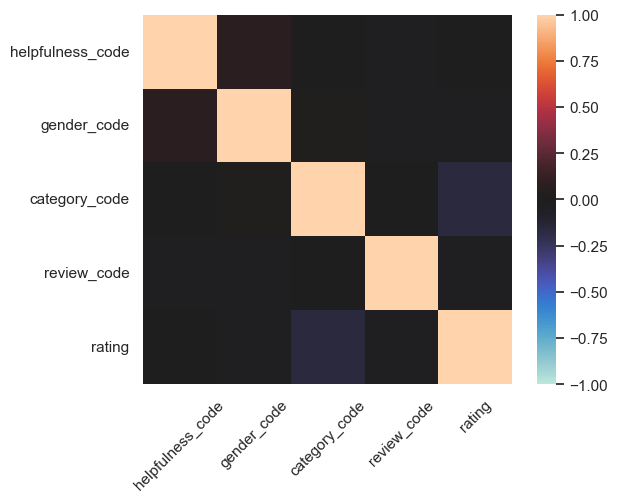

In [236]:
heatmap=sns.heatmap(correlation,vmin=-1,vmax=1,center=0,square=True) #creating heatmap for better visualization
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=45)

**CORRELATION ANALSIS FOR RATING VS DIFFERENT FEATURES**

1. The feature Helpfulness and rating are least correlated(ie -0.0075) close to zero followed by gender(-0.034
2. category and rating is significant negatively correlated (ie -0.1631).This suggests a weak negative relationship between the category of the item and its rating.
3. Since the correlations are generally weak, it's unlikely that using these features alone will result in highly accurate rating predictions in a regression model.
Weak correlations mean that the linear relationship between the features and the target variable (rating) is not strong. Therefore, using these features in a regression model might not capture the complex patterns and factors influencing the rating accurately
4. In experiments to verify this hypothesis training regression models using different combinations of features, including additional features if available, and evaluating their performance using metrics like mean squared error (MSE) or R-squared. This would help determine the impact of these features on the prediction results.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [237]:
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)#splitting dataset into train and test for modelling usinh train_test_split() function
print('the size of traning data is:',train_case1.shape)
print('the size of testing data is:',test_case1.shape)

the size of traning data is: (268, 15)
the size of testing data is: (2417, 15)


In [156]:
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)
print(train_case2.shape)
print(test_case2.shape)

(2416, 15)
(269, 15)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [243]:
reg_a = linear_model.LinearRegression()#initializing linear regression model 
x_train_a = train_case1[['category_code', 'review_code']]      # "case1/model A" training/testing with two most correlated features
y_train_a = train_case1['rating']

x_test_a = test_case1[['category_code', 'review_code']]
y_test_a = test_case1['rating']
reg_a.fit(x_train_a, y_train_a) #fitting in aregression model

LinearRegression()

In [244]:
reg_b = linear_model.LinearRegression()
x_train_b = train_case1[['helpfulness_code', 'gender_code']]# "case1/model B" training/testing with two least correlated features
y_train_b = train_case1['rating']

x_test_b = test_case1[['helpfulness_code', 'gender_code']]
y_test_b = test_case1['rating']
reg_b.fit(x_train_b, y_train_b)

LinearRegression()

In [245]:
reg_c = linear_model.LinearRegression()
x_train_c = train_case2[['category_code', 'review_code']]# case2 model c training/testing with two most correlated features
y_train_c = train_case2['rating']

x_test_c = test_case2[['category_code', 'review_code']]
y_test_c = test_case2['rating']
reg_c.fit(x_train_c, y_train_c)

LinearRegression()

In [246]:
reg_d= linear_model.LinearRegression()
x_train_d = train_case2[['helpfulness_code', 'gender_code']]# case2 model d training/testing with two most correlated features
y_train_d = train_case2['rating']

x_test_d = test_case2[['helpfulness_code', 'gender_code']]
y_test_d = test_case2['rating']
reg_d.fit(x_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [247]:
predicted_a = reg_a.predict(x_test_a) #predicting using x axis variable and predict function
mse_a = ((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)
r2_a= r2_score(y_test_a, predicted_a)
print("MSE:", mse_a)
rmse_a=np.sqrt(mse_a)
print('Root MSE=',rmse_a)
print("R Squared for model a:", r2_a)

MSE: 1.7690740179517055
Root MSE= 1.3300654186737229
R Squared for model a: 0.020578145218415278


In [248]:
predicted_b = reg_b.predict(x_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
r2_b= r2_score(y_test_b, predicted_b)
print("MSE:", mse_b)
rmse_b=np.sqrt(mse_b)
print('Root MSE=',rmse_b)
print("R Squared for model b:", r2_b)

MSE: 1.8412549895856636
Root MSE= 1.356928513071217
R Squared for model b: -0.019383789895821568


In [256]:
predicted_c = reg_c.predict(x_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
r2_a= r2_score(y_test_a, predicted_a)
print("MSE:", mse_c)
rmse_c=np.sqrt(mse_c)
print('Root MSE=',rmse_c)
print("R Squared for model c:", r2_c)

MSE: 1.758897535980505
Root MSE= 1.3262343442923294
R Squared for model c: 0.022040319944943154


In [252]:
predicted_d = reg_d.predict(x_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
r2_d= r2_score(y_test_a, predicted_a)
print("MSE:", mse_d)
rmse_d=np.sqrt(mse_d)
print('Root MSE=',rmse_d)
print("R Squared for model d:", r2_d)

MSE: 1.8109460127732369
Root MSE= 1.3457139416581954
R Squared for model d: 0.020578145218415278


**Evaluation**

1. After analyzing the MSE of each model,it can be said that model c has least mse and thus is a better model.

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [253]:
mse_df = pd.DataFrame({'mse': [mse_a,mse_b,mse_c,mse_d]}, index = ['model_a', 'model_b','model_c','model_d'])
rmse_df = pd.DataFrame({'rmse': [rmse_a, rmse_b,rmse_c,rmse_d]}, index = ['model_a', 'model_b','model_c','model_d'])

Text(0, 0.5, 'mse value')

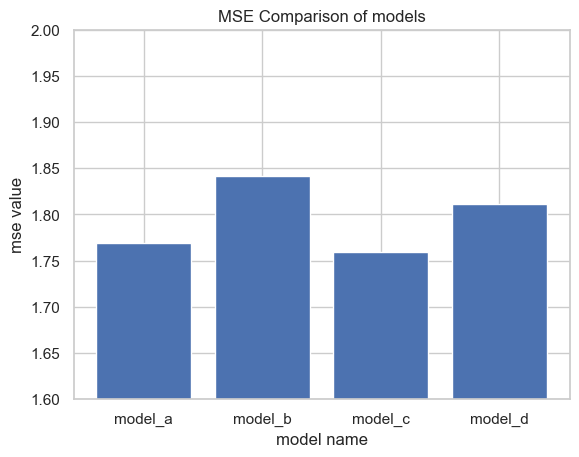

In [254]:
sns.set(style='whitegrid')
plt.ylim(1.6, 2.0)
plt.bar(data= mse_df, height = 'mse', x = ['model_a', 'model_b','model_c','model_d'], color = 'b')
plt.title("MSE Comparison of models")
plt.xlabel('model name')
plt.ylabel('mse value')

Text(0, 0.5, 'rmse value')

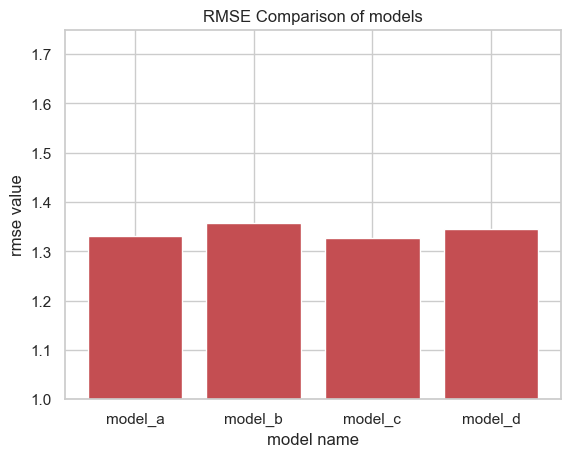

In [255]:
sns.set(style='whitegrid')
plt.ylim(1, 1.75)
plt.bar(data= rmse_df, height = 'rmse', x = ['model_a', 'model_b','model_c','model_d'], color = 'r')
plt.title("RMSE Comparison of models")
plt.xlabel('model name')
plt.ylabel('rmse value')

**Observations**

1. Among all models,"Model C" has lowest MSE thus it is the best model.this can be because model c consist of 90% training data and has significant correlated features.
2. Model 'B' can be considered less performing model with high MSE of 1.841.this is because it has 10% training data and least correlated features.




### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


Focusing solely on medal counts oversimplifies the concept of achievement. While infographics may clearly highlight which nations have garnered the most medals, this statistic often eclipses the individual accomplishments of many athletes. Merely ranking countries based on medal counts fails to capture the diverse range of athletic abilities or the varying levels of difficulty across sports. Even exceptionally talented athletes who deliver outstanding performances may not necessarily find themselves on the podium.

Furthermore, these infographics fail to consider important factors such as a nation's GDP and population size, which can significantly impact its medal count. Wealthier nations may have the means to invest more heavily in their sports programs, providing their athletes with an advantage. Consequently, this can skew the achievements of countries with fewer resources, creating an unfair playing field.

In addition, success in the Olympics is often influenced by a multitude of complex social, economic, and cultural factors. By solely focusing on medals, these infographics present a narrow and overly simplistic view of success.

Moreover, by emphasizing national pride based solely on medal counts, these infographics may overshadow the individual stories of perseverance and triumph. The personal journeys and triumphs of athletes may be eclipsed by the broader narrative of national prestige associated with medal totals. Recognizing individual excellence alongside national achievements is crucial for a more holistic understanding of success in the Olympics.